In [4]:
import pickle
import csv
import pandas as pd

#df = pd.read_pickle('final_analysis.pkl')
df = pd.read_pickle('full_tweets.pkl')
df = df[df['retweet']==True]

df = df.reset_index()

#network = pd.read_csv('Community_complete.csv')
data = pd.read_csv('complete.csv')
data

Source        Target      Type     Id  Label  timeset  Weight
0            DibeiChan     flytoemma  Directed      0    NaN      NaN       1
1         Jada_Fonseca     slycoupe_  Directed      1    NaN      NaN       1
2          jamilalesan     slycoupe_  Directed      2    NaN      NaN       1
3      BecomingDrAndra    MindaHarts  Directed      3    NaN      NaN       1
4        saulmoralitos  jollenelevid  Directed      4    NaN      NaN       1
...                ...           ...       ...    ...    ...      ...     ...
40910  AmethystAmber87   penninreads  Directed  40910    NaN      NaN       1
40911        lawhorn06  kylegriffin1  Directed  40911    NaN      NaN       1
40912        JDBaldMan   amber_athey  Directed  40912    NaN      NaN       1
40913    TravelFoolMan  kylegriffin1  Directed  40913    NaN      NaN       1
40914      Trekker2000            AP  Directed  40914    NaN      NaN       1

[40915 rows x 7 columns]

In [5]:
df 

index             tweet_id                tweet_created_at  \
0          0  1372666947045707777  Thu Mar 18 21:51:17 +0000 2021   
1          1  1372687822885249025  Thu Mar 18 23:14:14 +0000 2021   
2          3  1372687859598041090  Thu Mar 18 23:14:23 +0000 2021   
3          4  1372687864174088198  Thu Mar 18 23:14:24 +0000 2021   
4          5  1372687872847880194  Thu Mar 18 23:14:26 +0000 2021   
...      ...                  ...                             ...   
83849  93321  1381225433945927684  Sun Apr 11 12:39:40 +0000 2021   
83850  93322  1381225608080932865  Sun Apr 11 12:40:21 +0000 2021   
83851  93323  1381225744853045248  Sun Apr 11 12:40:54 +0000 2021   
83852  93324  1381221644459507712  Sun Apr 11 12:24:36 +0000 2021   
83853  93325  1381216255798083586  Sun Apr 11 12:03:11 +0000 2021   

                                                    text  \
0      please read this #StopAsianHate https://t.co/w...   
1      Jaden Smith wasn’t in that alleyway crying for...   
2      omg hey what if we denounce violence against A...   
3      Jaden Smith wasn’t in that alleyway crying for...   
4      someone please tell me why this Asian woman wh...   
...                                                  ...   
83849  CNN used a photo of the wrong Asian golfer in ...   
83850  A New York man is facing hate crime charges af...   
83851  Ask Biden when is some of that hate crime mone...   
83852  A New York man is facing hate crime charges af...   
83853  A New York man is facing hate crime charges af...   

                                               tweet_url  retweet  quote  \
0                                                   None     True  False   
1                                                   None     True   True   
2                                                   None     True  False   
3                                                   None     True   True   
4                                                   None     True   True   
...                                                  ...      ...    ...   
83849                                               None     True  False   
83850                             https://bit.ly/3mAq0BU     True  False   
83851  https://news.yahoo.com/california-man-convicte...     True  False   
83852                             https://bit.ly/3mAq0BU     True  False   
83853                             http://apne.ws/pkXHDEX     True  False   

                    mentions         hashtags  \
0      [1330945857907265545]  [StopAsianHate]   
1       [848211471314165762]           [None]   
2                [623007529]           [None]   
3       [848211471314165762]           [None]   
4               [3173903132]           [None]   
...                      ...              ...   
83849            [248469208]           [None]   
83850             [32871086]           [None]   
83851             [16948493]           [None]   
83852             [32871086]           [None]   
83853             [51241574]           [None]   

                                       this_tweet_source  ... have_kids  \
0      <a href="http://twitter.com/download/iphone" r...  ...     False   
1      <a href="http://twitter.com/download/iphone" r...  ...     False   
2      <a href="http://twitter.com/download/iphone" r...  ...     False   
3      <a href="http://twitter.com/download/iphone" r...  ...     False   
4      <a href="http://twitter.com/download/iphone" r...  ...     False   
...                                                  ...  ...       ...   
83849  <a href="https://mobile.twitter.com" rel="nofo...  ...     False   
83850  <a href="http://twitter.com/download/android" ...  ...     False   
83851  <a href="http://twitter.com/download/iphone" r...  ...     False   
83852  <a href="https://mobile.twitter.com" rel="nofo...  ...     False   
83853  <a href="http://twitter.com/download/android" ...  ...     False   

        income        level1 level2             race a

In [2]:
data['Weight'].value_counts()

1    40915
Name: Weight, dtype: int64

In [6]:
df['level1'].value_counts()

support         42283
denouncement    14452
news            14051
double           7292
negative         4340
policy           1436
Name: level1, dtype: int64

In [19]:
df = df[df['level1']=='policy']
df = df.reset_index()
df

level_0  index             tweet_id                tweet_created_at  \
0        187    204  1372689664650440707  Thu Mar 18 23:21:34 +0000 2021   
1        513    557  1372685526969503746  Thu Mar 18 23:05:07 +0000 2021   
2        525    569  1372685977039335433  Thu Mar 18 23:06:54 +0000 2021   
3        685    740  1372696715703255046  Thu Mar 18 23:49:35 +0000 2021   
4        889    965  1372699109916819461  Thu Mar 18 23:59:05 +0000 2021   
..       ...    ...                  ...                             ...   
683    33000  36963  1377319976097480707  Wed Mar 31 18:00:46 +0000 2021   
684    34556  38814  1377758441981292545  Thu Apr 01 23:03:04 +0000 2021   
685    34698  38979  1377476632085061632  Thu Apr 01 04:23:16 +0000 2021   
686    34800  39096  1377470108646391810  Thu Apr 01 03:57:20 +0000 2021   
687    39561  44575  1379826475617107968  Wed Apr 07 16:00:42 +0000 2021   

                                                  text tweet_url  retweet  \
0    Watching people claim the alleged murderer of ...      None     True   
1    So i've been reading up on Asian American hist...      None     True   
2    Looking forward to joining @JoyAnnReid on #The...      None     True   
3    One day after 8 people were killed due to hatr...      None     True   
4    Even as we’ve battled the pandemic, we’ve cont...      None     True   
..                                                 ...       ...      ...   
683  How does a man who stabbed his own mother to d...      None     True   
684  Even as we’ve battled the pandemic, we’ve cont...      None     True   
685  How does a man who stabbed his own mother to d...      None     True   
686  How does a man who stabbed his own mother to d...      None     True   
687  Today it's a tragedy in Boulder, Colorado. Thi...      None     True   

     quote                                           mentions      hashtags  \
0    False                                        [130557513]        [None]   
1    False                                         [49841540]        [None]   
2     True  [1349170292564905988, 49698134, 13491490969096...  [TheReidOut]   
3    False                                         [57371662]        [None]   
4    False                                           [813286]        [None]   
..     ...                                                ...           ...   
683   True                                         [39308549]        [None]   
684  False                                           [813286]        [None]   
685   True                                         [39308549]        [None]   
686   True                                         [39308549]        [None]   
687  False                                         [44177383]        [None]   

     ... have_kids   income   race age_group              politics  \
0    ...     False  28210.0  white     18-29     Following neither   
1    ...     False  36972.0  black     30-49     Following neither   
2    ...     False  28890.0  black     30-49  Only following Biden   
3    ...     False  11075.0  black     18-29     Following neither   
4    ...     False  29495.0  white     30-49     Following neither   
..   ...       ...      ...    ...       ...                   ...   
683  ...     False  23546.0  white     18-29     Following neither   
684  ...     False  35191.0  white       65+     Following neither   
685  ...     False  32984.0  asian     30-49     Following neither   
686  ...     False  31248.0  white     30-49     Following neither   
687  ...     False  26789.0  white       65+     Following neither   

    income_group       date     value  level1  level2  
0            low 2021-03-18  0.011579  policy    16.0  
1           high 2021-03-18  0.103463  policy    16.0  
2            low 2021-03-18  0.119501  policy    16.0  
3            low 2021-03-18  0.119501  policy    16.0  
4            low 2021-03-18  0.072522  policy    27.0  
..           ...        ...       ...    

In [53]:
df['retweet_user_screen_name'].value_counts()[0:10]

JimLaPorta        1175
syndullatano      1085
ktnuggin           960
KungLab            958
AndyKimNJ          643
tedlieu            629
jollenelevid       588
MrAndyNgo          568
TheTinaVasquez     552
CeFaanKim          526
Name: retweet_user_screen_name, dtype: int64

In [67]:
df['level1'].value_counts()

support         22098
news             6301
denouncement     6023
double           3602
negative         2203
policy            688
Name: level1, dtype: int64

In [12]:
df[df['retweet_user_screen_name']=='ktnuggin']['level1'].value_counts()

support         811
denouncement     43
news             41
double           35
negative         29
policy            1
Name: level1, dtype: int64

In [27]:
df['quote_text']

0       "There's old sayings in Texas about find all t...
1       I am an Asian American woman working in public...
2       One day after 8 people were killed due to hatr...
3       The Asian community has never stood by the Bla...
4       Just came upon an attack on an elderly Asian w...
                              ...                        
5138    On 3/15, I agreed to write this. On 3/16, the ...
5139    A New York man is facing hate crime charges af...
5140    For folks who think anti-Asian hate crimes don...
5141    CNN used a photo of the wrong Asian golfer in ...
5142    BREAKING: Two teen girls accused of car-jackin...
Name: quote_text, Length: 5095, dtype: object

In [23]:
data['Target'].value_counts()

JimLaPorta       1175
syndullatano     1085
ktnuggin          960
KungLab           958
AndyKimNJ         643
                 ... 
TM_Manu_Forti       1
UwaziZamani         1
PiperPerabo         1
TeaPainUSA          1
traciglee           1
Name: Target, Length: 732, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40915 entries, 0 to 40914
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   index                                 40915 non-null  int64              
 1   tweet_id                              40915 non-null  object             
 2   tweet_created_at                      40915 non-null  datetime64[ns, UTC]
 3   text                                  40915 non-null  object             
 4   tweet_url                             7172 non-null   object             
 5   retweet                               40915 non-null  bool               
 6   quote                                 40915 non-null  bool               
 7   mentions                              40915 non-null  object             
 8   hashtags                              40915 non-null  object             
 9   this_tweet_source

In [41]:
df[df['retweet_user_screen_name']=='CeFaanKim']['retweet_user_followers_count']

768      13899.0
1688     13866.0
1705     13866.0
1904     13867.0
1918     13866.0
          ...   
35146    23088.0
35154    23084.0
40215    23432.0
40239    23421.0
40242    23425.0
Name: retweet_user_followers_count, Length: 526, dtype: float64

In [20]:
df[df['screen_name']=='ktnuggin']

Empty DataFrame
Columns: [index, tweet_id, tweet_created_at, text, tweet_url, retweet, quote, mentions, hashtags, this_tweet_source, user_id, account_created_at, name, screen_name, description, location, verified, followers_count, friends_count, listed_count, favourites_count, statuses_count, profile_image_url_https, retweet_tweet_id, retweet_tweet_created_at, retweet_text, retweet_tweet_url, retweet_user_source, retweet_favorite_count, retweet_quote_count, retweet_reply_count, retweet_retweet_count, retweet_user_id, retweet_user_created_at, retweet_user_name, retweet_user_screen_name, retweet_user_description, retweet_user_location, retweet_user_verified, retweet_user_followers_count, retweet_user_friends_count, retweet_user_listed_count, retweet_user_favourites_count, retweet_user_statuses_count, retweet_user_profile_image_url_https, quote_tweet_id, quote_tweet_created_at, quote_text, quote_tweet_url, quote_user_source, quote_favorite_count, quote_quote_count, quote_reply_count, quote_retweet_count, quote_user_id, quote_user_created_at, quote_user_name, quote_user_screen_name, quote_user_description, quote_user_location, quote_user_verified, quote_user_followers_count, quote_user_friends_count, quote_user_listed_count, quote_user_favourites_count, quote_user_statuses_count, quote_user_profile_image_url_https, location_fine, state, gender, age, county, pop_density, Biden, Trump, faith, have_kids, income, race, age_group, politics, income_group, date, value, level1, level2]
Index: []

[0 rows x 86 columns]

In [8]:
data['Target'].value_counts()[0:10]

JimLaPorta        1175
syndullatano      1085
ktnuggin           960
KungLab            958
AndyKimNJ          643
tedlieu            629
jollenelevid       588
MrAndyNgo          568
TheTinaVasquez     552
CeFaanKim          526
Name: Target, dtype: int64

In [9]:
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'], errors='coerce')
data['timeset'] = df['tweet_created_at']
data

Source        Target      Type                   timeset
0            DibeiChan     flytoemma  Directed 2021-03-18 21:51:17+00:00
1         Jada_Fonseca     slycoupe_  Directed 2021-03-18 23:14:14+00:00
2          jamilalesan     slycoupe_  Directed 2021-03-18 23:14:24+00:00
3      BecomingDrAndra    MindaHarts  Directed 2021-03-18 23:14:28+00:00
4        saulmoralitos  jollenelevid  Directed 2021-03-18 23:14:38+00:00
...                ...           ...       ...                       ...
40910  AmethystAmber87   penninreads  Directed 2021-04-11 12:17:01+00:00
40911        lawhorn06  kylegriffin1  Directed 2021-04-11 12:31:52+00:00
40912        JDBaldMan   amber_athey  Directed 2021-04-11 12:39:40+00:00
40913    TravelFoolMan  kylegriffin1  Directed 2021-04-11 12:24:36+00:00
40914      Trekker2000            AP  Directed 2021-04-11 12:03:11+00:00

[40915 rows x 4 columns]

In [75]:
d='2015-01-08 22:44:09' 
date=pd.to_datetime(d).date()
print(date)

2015-01-08


In [78]:
data.to_csv('Retweet_net.csv',index=False,date_format='%Y-%m-%d')

KungLab: Are you sad and angry about the surge in anti-Asian violence? Wondering if there’s something 
anti-racist you can do? One idea: learn how pronounce Asian names! It doesn’t have to be perfect. Just try, 
and it will make a difference to your Asian friends and people you meet. (1/8)


In [31]:
df_2 = df[df['retweet_user_screen_name']=='KungLab']
df_2[df_2['level2']==1.0]

tweet_id                tweet_created_at  \
24     1372687552130469891  Thu Mar 18 23:13:10 +0000 2021   
65     1372688181473157122  Thu Mar 18 23:15:40 +0000 2021   
140    1372687316074913792  Thu Mar 18 23:12:14 +0000 2021   
179    1372690297071804417  Thu Mar 18 23:24:04 +0000 2021   
217    1372690114757861379  Thu Mar 18 23:23:21 +0000 2021   
...                    ...                             ...   
33785  1376970251263434759  Tue Mar 30 18:51:05 +0000 2021   
36555  1377334144556883971  Wed Mar 31 18:57:04 +0000 2021   
37253  1377094488024305671  Wed Mar 31 03:04:45 +0000 2021   
39436  1378108505043972096  Fri Apr 02 22:14:06 +0000 2021   
45976  1381111960364720129  Sun Apr 11 05:08:45 +0000 2021   

                                                    text tweet_url  retweet  \
24     Are you sad and angry about the surge in anti-...      None     True   
65     Are you sad and angry about the surge in anti-...      None     True   
140    Are you sad and angry about the surge in anti-...      None     True   
179    Are you sad and angry about the surge in anti-...      None     True   
217    Are you sad and angry about the surge in anti-...      None     True   
...                                                  ...       ...      ...   
33785  Are you sad and angry about the surge in anti-...      None     True   
36555  Are you sad and angry about the surge in anti-...      None     True   
37253  Are you sad and angry about the surge in anti-...      None     True   
39436  Are you sad and angry about the surge in anti-...      None     True   
45976  Are you sad and angry about the surge in anti-...      None     True   

       quote               mentions hashtags  \
24     False  [1156209153469288448]   [None]   
65     False  [1156209153469288448]   [None]   
140    False  [1156209153469288448]   [None]   
179    False  [1156209153469288448]   [None]   
217    False  [1156209153469288448]   [None]   
...      ...                    ...      ...   
33785  False  [1156209153469288448]   [None]   
36555  False  [1156209153469288448]   [None]   
37253  False  [1156209153469288448]   [None]   
39436  False  [1156209153469288448]   [None]   
45976  False  [1156209153469288448]   [None]   

                                       this_tweet_source             user_id  \
24     <a href="http://twitter.com/download/iphone" r...          2729588578   
65     <a href="http://twitter.com/download/iphone" r...            15387799   
140    <a href="http://twitter.com/download/iphone" r...           122152304   
179    <a href="http://twitter.com/download/iphone" r...           859078160   
217    <a href="https://mobile.twitter.com" rel="nofo...           541258943   
...                                                  ...                 ...   
33785  <a href="http://twitter.com/download/iphone" r...  834920979289751552   
36555  <a href="http://twitter.com/download/iphone" r...  728747519090495488   
37253  <a href="http://twitter.com/download/iphone" r...          1258002313   
39436  <a href="http://twitter.com/download/iphone" r...            53155602   
45976  <a href="https://mobile.twitter.com" rel="nofo...          2693503403   

       ... have_kids   income   race age_group           politics  \
24     ...     False  42690.0  black     30-49  Following neither   
65     ...     False  26697.0  black     30-49  Following neither   
140    ...     False  26697.0  white     30-49  Following neither   
179    ...     False  24564.0  white     30-49  Following neither   
217    ...     False  20057.0  white     30-49  Following neither   
...    ...       ...      ...    ...       ...                ...   
33785  ...     False  20817.0  white     18-29  Following neither   
36555  ...     False  37140.0  white     18-29  Following neither   
37253  ...     False  30333.0  white     18-29  Following neither   
39436  ...     False  30506.0  white     30-49  Following neither   
45976  ...     False  30488

In [32]:
df[df['retweet_user_screen_name']=='AmyChanta']['level2'].value_counts()

19.0    146
0.0      16
1.0       9
7.0       5
26.0      5
14.0      3
18.0      3
15.0      2
16.0      2
11.0      2
20.0      2
12.0      2
6.0       2
13.0      1
39.0      1
23.0      1
Name: level2, dtype: int64

In [10]:
network['modularity_class'].value_counts()

465    1176
249    1161
641    1086
13      973
305     694
       ... 
194       2
677       2
610       2
229       2
666       2
Name: modularity_class, Length: 699, dtype: int64

In [44]:
df_1 = df[df['retweet_user_screen_name']=='JimLaPorta']
df_1['politics'].value_counts(normalize=True)

Following neither       0.707234
Only following Biden    0.223830
Only following Trump    0.046809
Following both          0.022128
Name: politics, dtype: float64

In [27]:
for text in df['retweet_text']:
    print(text)

please read this #StopAsianHate https://t.co/wzxwtby342
Jaden Smith wasn’t in that alleyway crying for nothing
Jaden Smith wasn’t in that alleyway crying for nothing
I don’t know who needs to hear this but Asian and Black lives can matter at the same time. We don’t stop fighting for one group—we fight for all groups who are targeted by white supremacy at the same time.
Rest In Peace:

- Delaina Ashley Yaun, 33, mother of a 14 year old &amp; 8mo old
- Xiaojie Tan, 49, massage therapist &amp; owner of 1 spa
- Daoyou Feng, 44
- Julie Park, in her 70s
- Hyeon Jeong Park, 50s
- Paul Andre Michels

(2 more not yet named)

CENTER THE VICTIMS. #StopAsianHate
An elderly woman attacked on Market St. in San Francisco Wednesday and turned the tables on her attacker, leaving him with injuries that required a trip to the hospital. Serves him right! #StopAsianHate 
#StopAAPIHate 

🎥 @denniskpix 
@kpixtv https://t.co/o236bsUD0B
An elderly woman attacked on Market St. in San Francisco Wednesday and tur

If you stand in solidarity with your fellow Asian Americans, RT.
Sen. Tammy Duckworth is urging FBI Dir. Wray and Attorney General Garland to direct their agencies to take immediate action to strengthen federal criminal investigations, law enforcement and prosecution of federal criminal cases against perpetrators of Asian American hate crimes.
Xiaojie Tan was killed the day before her 50th birthday, when she “would have gathered with her only child for a slice of strawberry fresh cream cake, her favorite. The mother and daughter were best friends.” So devastating.  https://t.co/Q2o36mvZwj
Are you sad and angry about the surge in anti-Asian violence? Wondering if there’s something anti-racist you can do? One idea: learn how pronounce Asian names! It doesn’t have to be perfect. Just try, and it will make a difference to your Asian friends and people you meet. (1/8)
2012: mass shooting at a Sikh temple
2014: mass shooting targeting women
2015: mass shooting at a Black church
2016: mass sh

Today @POTUS and I met with Asian American leaders in Atlanta, Georgia to discuss the rise in attacks against the community. We want Asian Americans in Georgia and across our nation to know: We won't be silent. We won't standby. We will always speak out against violence.
“Words have consequences. 
It’s the Coronavirus.
Full stop.”
-@POTUS 
#StopAsianHateCrimes
In our video pronunciation guide, reporters @JaniceYuNews and @FrancesWangTV state the correct pronunciations of the Chinese- and Korean-language names of the victims in the Atlanta spa shootings.

See the full guide: https://t.co/oNAJSWUD9h https://t.co/tlAUFe9WKM
Today @POTUS and I met with Asian American leaders in Atlanta, Georgia to discuss the rise in attacks against the community. We want Asian Americans in Georgia and across our nation to know: We won't be silent. We won't standby. We will always speak out against violence.
Here's my short essay for @SportsCenter on what it means to be Asian American. @espn https://t.co/n

thinking about the time i called out a white girl for fetishizing Asian woman. she ended up crying and then told me she felt mistreated by me...it's been 2 years and i'm now just processing how white women continually weaponize their tears and make YOU feel like you overreacted
Watching people claim the alleged murderer of 6 Asian women was not motivated by racism, only by 'sexual addiction,' I'm reminded of the 2015 Chapel Hill execution-style shooting of 3 Muslim students, which we were told was not a hate crime but merely a 'parking dispute'.
it's not lost on me that a white man can murder 8 asian women and be arrested alive but breonna taylor was killed by police while she was sleeping.
WHITE TERRORISM IS STILL TERRORISM. CALL. IT. THAT. #StopAsianHate https://t.co/JfIc6FHzTS
Jill and I are keeping everyone impacted by the shootings in Atlanta in our prayers. We don’t yet know the motive, but what we do know is that the Asian-American community is feeling enormous pain tonight. The

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [81]:
for t in df['screen_name']:
    print(t)

Jada_Fonseca
jamilalesan
jackieantun
cupidsfakelover
HasheeshAkballa
shelliesanmann
moneybaggkayy__
anotherblackgi2
Wayfinder_Ash
module_kit
bandoughchris
iamtaylorwinter
jaaniss5
isuhsmell
cozyycaro
Adita1212
dakotacoco
hollymrushton
sky3_kitty
asapashx
morgancioth
fumbld
mimi_phoenix
cruzerocket
pharoah_j20
ohgeedadon
Mccloskeyjl
Jalaya_B
AleeyuArah
MadelynTheRose
llopsokopolis
mskittymaam
azn_sensazn_
itsgermanbro
rosicrucian1970
zaahirarihel
bidneybumanga
SFC_Champs
ashleylatae
DevonRogerss
thetrillest_j
Lexi_Hoth
Mrtonywriter
FamousssOG
MikeBaptiste1
ClaudeVonCok
hotgirlnatt
noahjackson1998
Kiiananana
phattestofpats
olegirlaut
HooperName_FJ
idrinaa
yush1ny
gamestationpro
aesposito1
Rototoaster
noel_trevin
RoeJoestar
magstaswagsta
rowanlikeaboat
xycochik
semperdiced
ChristianLeu
jmdf4325
KVennie
Slackz15
_TheDyingStar
EricRRivera
YassirLFC
unDEEniable__
imwillgarner
Omardicion
Dudeitsnathalie
mlassi
TangelaTaylor1
HxshiHiime
raycalonzo
u_raah
andyl_h
BaebMav
leilaa_munoz
Macheesepl

golden_nessa
sensei_sean
RTubbs18
epanda3333
needthatlife
KevinSDouglas
Marii_Rdz94
jjw415
adumbwin
blue_yung12
sammtz747
2ne1_natalia
meokjjin
vivyanadanielle
sage__amber
lizz2406
allison_bruce18
paleungii
punishedthumbs
yorachel__
ArgozArtz
KaylinPark
EuphoriaLuu
DarlingNakamoto
phonehome_22
_arianalarosa_
Verena_Soliman
arcadefriar
babygirlmichiee
LMFAOOOOBYE
L0VH0BI
PiecesOfTori
VioletHH5
aleedeevee
Raquel_Argudin
AllyElizabeth98
welovepurpleMOA
Firousi46
LizAlderfer
Sleep_Will_Come
yummyjeffbezos
mattmichler
codenseki
ypryesli
ch_amy_amy
myliapurpleb
BeatriceGodinez
kaxiong23
itsbenting
sharilizpoveda
domilovesmuzik
dylanalvar3z
ashleyfuller7
LAngelsteelers
tonynominated
NaesInterlude_x
suchitrav
iskinn223
bestburke
jayshoneyyy
aliciamaaarie
AllTimeZackk
carlosxaguirre2
yeahhlisa
hyejunie
wlliams_shawn
YoonKad2
_Joonbestleader
mimins_ego
dracadesigns
carlfortunatoo
Rhizine10
b_hollow_
blinkilite
MoenClifford
llmerlinll
btsbasuraa
strawberrybri13
Stephy_KPOP
mang6_13
BTSisARMY91
An

pgalloway417
jsscxviii
stephhhh218
MoiMoi1k
KyleEpley13
maurissalove25
itselijahkhalil
_summeeerrr
EshaMeann
ccdjd_
sdlnewyr
uhlisssaaa
dasanniiii
its_welchel
elsy_soya
MyTimVanHorn
benj_tripp
AceGlover1
jewjew5446
professor_2bbls
kiittenbiitch
MCHELLEAPRIL
CarlSch66
AshorDeKelaita
KEiiBLVD_
taydollazz_
morenabasteiro
blessedluhky
_avault
GritzNGravyKCMO
VsBeemo
JeremiaBryanR
stevoflwrs
gray_roses
UrielS23_
KathiInCali
Julieandalice
johnrbret
fourtwentyypm
blackbear451
Clint_Edwards
sarahguestperry
kaylacritten
COLE_WORLD93
papibrandon69
Bigdaddy_bubs52
dwhat_pendl14
coreyhopkins_
TheSedShow
Malibu__Mel
Zae_Godly
Isvyuhkun
iHoop_Nude
jlaud_29
GatoGrande9994
jasmrtz
Kreamfilled1
JenJoPDX
ItsDeonJulio
xsupremelee
briandb03
Cursedcrackhous
El_tigre32
mrsVCandy
liitssa
joannalinblack
BobFinke1
Maya18713750
hounoah
Dari_love29
ayylyno
Chloeee2017
brystevepick
cremelesa
MikeSmith2k
_edu_ignorance
vibewithtoody
RexDixon
anniedelgado21
brod_chris4
Plamskiii
BryceDCurry
HenryFung_
Josh_Slosh
tu

CrissyChapmanSB
KyleM_Bynum
moneym4rcus
ChanceFeb16
King_Steels
jayyxamour
neptunezwave_
lesalicious93
SupportJeremiah
AmazingKev_
Zaaee____
keem_Lowrey
Je_Hardaway
errmmett
CarKese
whykuy
WadesDeadAgain
highdevinition
ayanna_lowe15
zia_villarreal
respctheshootr
elprimodejiren
cam_featherston
Chloeburgundy
_THEEYANA
EwwMaryJane
Daelight__
king_oliver313
GasUpJay
kellyhamed
Yahzayah_zay
TheNamesAizen
SalomeK_1
Ace_1way
mollyyjayy_
Kiing_Flash_
sunflowerbabyc
trayjudo
_trentonjames31
DorienHudson
mamameraa
boogiedowntims
modproductionz
_JoeCash
ItsTheRenegade
xostephanyy
leeeeelee
xoshamiyah
nicolaaasloopez
sunnyXo9
keithbricejr
SirLuke93
insalaco67
villejaz28
marrissagalvez
VanitySlaves_
ODozier
k_easy23
RoseJayyyy
reneethawriter_
CalebLongest
BABYFACEDG0D
shelexicrystal
chuckyo_
ShannonF698
YNOT_TweetMe
Bigguccikt
nyspicegirl
momopattpatt
Whitedenzel1
kelamila_
crunchberriesss
Myeshaaaa__
ODDrew12
jahbria_barron
mad__die
DoubleOSteeze
1kuzzo
yeahdorien
aquathot123
vonleeee
SouthernBruj

In [82]:
for t in df['text']:
    print(t)
    

Jaden Smith wasn’t in that alleyway crying for nothing
Jaden Smith wasn’t in that alleyway crying for nothing
killing 8 asian women because of his racist sexual fetishes is a hate crime not a bad fucking day
what liberal media will NOT report on --we were out there last night demanding an end to U.S. imperialism/settler colonialism --from Korea to the Philippines to Haiti to Palestine and beyond, and the full decriminalization of sex work
Jaden Smith wasn’t in that alleyway crying for nothing
You literally control the site. Do it yourself here. Ban hate accounts.
Imagine this as our history and then being asked why we aren’t better allies to Asian Americans.
Jaden Smith wasn’t in that alleyway crying for nothing
what liberal media will NOT report on --we were out there last night demanding an end to U.S. imperialism/settler colonialism --from Korea to the Philippines to Haiti to Palestine and beyond, and the full decriminalization of sex work
what liberal media will NOT report on --we 

You literally control the site. Do it yourself here. Ban hate accounts.
You literally control the site. Do it yourself here. Ban hate accounts.
someone please tell me why this Asian woman who just got punched is only given a pack of ice while the attacker gets to be in a stretcher ??? MAKE IT MAKE SENSE
You literally control the site. Do it yourself here. Ban hate accounts.
The attacker is gently pulled away in a stretcher and victim is left bleeding on the street trying to process her pain.
You literally control the site. Do it yourself here. Ban hate accounts.
Jaden Smith wasn’t in that alleyway crying for nothing
someone please tell me why this Asian woman who just got punched is only given a pack of ice while the attacker gets to be in a stretcher ??? MAKE IT MAKE SENSE
Jaden Smith wasn’t in that alleyway crying for nothing
someone please tell me why this Asian woman who just got punched is only given a pack of ice while the attacker gets to be in a stretcher ??? MAKE IT MAKE SENSE

There have been more View co-hosts who are children of famous people than view co-hosts who are Asian. Does she really think that's because there aren't enough Asian people with the right qualifications?
There have been more View co-hosts who are children of famous people than view co-hosts who are Asian. Does she really think that's because there aren't enough Asian people with the right qualifications?
One of the Capitol people from The Hunger Games who only has her job because of her last name is trying to lecture us about "qualifications."
There have been more View co-hosts who are children of famous people than view co-hosts who are Asian. Does she really think that's because there aren't enough Asian people with the right qualifications?
There have been more View co-hosts who are children of famous people than view co-hosts who are Asian. Does she really think that's because there aren't enough Asian people with the right qualifications?
There have been more View co-hosts who are

I’m Asian American and I belong here. RT if you are too or you agree. https://t.co/smpLBqQile
I’m Asian American and I belong here. RT if you are too or you agree.
Let’s catch this criminal. #StopAsianHate
This is a 65-year-old Filipina on her way to church in NYC *yesterday* and getting brutally attacked out of nowhere. Shit is fucking haunting, man.
This is a 65-year-old Filipina on her way to church in NYC *yesterday* and getting brutally attacked out of nowhere. Shit is fucking haunting, man.
I’m Asian American and I belong here. RT if you are too or you agree.
This is evil. This is heartbreaking. The attack. The lack of help. And the closing of the door. WTF is wrong with people!? Anti-Asian hate must stop NOW!
Very few people have more influence around the world than @BTS_twt and the #BTSARMY. Thank you for using your platform to speak up and share your experience. #대한민국화이팅 #stopasianhate
Very few people have more influence around the world than @BTS_twt and the #BTSARMY. Thank y

But it’s all typa slavery and kkk shit still floating on there lol the world really backwards
But it’s all typa slavery and kkk shit still floating on there lol the world really backwards
hmm not defending anything but if they have to power to do this then why aren't they actively going after nazis and people who push hate speech of all kinds on their platform lmao
hmm not defending anything but if they have to power to do this then why aren't they actively going after nazis and people who push hate speech of all kinds on their platform lmao
Wait but he can rap about killing blacks just not robbing Asians, I’m confused but not really
hmm not defending anything but if they have to power to do this then why aren't they actively going after nazis and people who push hate speech of all kinds on their platform lmao
Remember you can rap about robbing and killing Black ppl all day everyday. The moment you target that energy anywhere else it becomes a problem. And yet some will still argue tha

Remember you can rap about robbing and killing Black ppl all day everyday. The moment you target that energy anywhere else it becomes a problem. And yet some will still argue that music isn't being used as a weapon
hmm not defending anything but if they have to power to do this then why aren't they actively going after nazis and people who push hate speech of all kinds on their platform lmao
hmm not defending anything but if they have to power to do this then why aren't they actively going after nazis and people who push hate speech of all kinds on their platform lmao
hmm not defending anything but if they have to power to do this then why aren't they actively going after nazis and people who push hate speech of all kinds on their platform lmao
Remember you can rap about robbing and killing Black ppl all day everyday. The moment you target that energy anywhere else it becomes a problem. And yet some will still argue that music isn't being used as a weapon https://t.co/fGcmnCixZq
hmm no

In [20]:

for t in df['quote_text']:
    print(t)

Do Asian people even like black people
Do Asian people even like black people
"Yesterday was a really bad day for him and this is what he did" -- a law enforcement official explains Robert Aaron Long's decision to kill 8 people in a strange manner https://t.co/u0zFcqjbNK
“We demand the full decriminalization of sex work”

#DCProtests Rally of Solidarity Against White Supremacy 
#StopAsianHate  #StopAAPIHate https://t.co/TwpxfzE6K3
Do Asian people even like black people
#StopAsianHate
#StopAsianHate
#StopAsianHate
#StopAsianHate
#StopAsianHate
#StopAsianHate
#StopAsianHate
#StopAsianHate
On the 30th anniversary of her passing, we celebrate and honor the life of Latasha Harlins. https://t.co/0vGQqjA2ZE
Do Asian people even like black people
“We demand the full decriminalization of sex work”

#DCProtests Rally of Solidarity Against White Supremacy 
#StopAsianHate  #StopAAPIHate https://t.co/TwpxfzE6K3
“We demand the full decriminalization of sex work”

#DCProtests Rally of Solidarity Agai

Jay Leno Apologizes for Decades of Jokes About Asians: ‘In My Heart I Knew It Was Wrong’ https://t.co/91t58CCxrY
Meghan McCain: "We’ve only had one Asian American host co-host host this show. Does that mean one of us should be leaving because there’s not enough representation? We're talking about -- is identity politics more important than the qualifications for the job?" https://t.co/0nN1ilB9Nn
Jay Leno Apologizes for Decades of Jokes About Asians: ‘In My Heart I Knew It Was Wrong’ https://t.co/91t58CCxrY
Jay Leno Apologizes for Decades of Jokes About Asians: ‘In My Heart I Knew It Was Wrong’ https://t.co/91t58CCxrY
Meghan McCain: "We’ve only had one Asian American host co-host host this show. Does that mean one of us should be leaving because there’s not enough representation? We're talking about -- is identity politics more important than the qualifications for the job?" https://t.co/0nN1ilB9Nn
Meghan McCain: "We’ve only had one Asian American host co-host host this show. Does that 

I’ve decided to “identify” as Chinese. Coke will like me, Delta will agree with my “values” and I’ll probably get shoes from Nike &amp; tickets to @MLB games.  Ain’t America great?
I’ve decided to “identify” as Chinese. Coke will like me, Delta will agree with my “values” and I’ll probably get shoes from Nike &amp; tickets to @MLB games.  Ain’t America great?
I’ve decided to “identify” as Chinese. Coke will like me, Delta will agree with my “values” and I’ll probably get shoes from Nike &amp; tickets to @MLB games.  Ain’t America great?
An elderly East Asian couple in Oakland, Cal. was robbed by four black males after they returned home from grocery shopping. Their son emerged from the house with a machete to help his parents. https://t.co/hbMzcKZXEG
I’ve decided to “identify” as Chinese. Coke will like me, Delta will agree with my “values” and I’ll probably get shoes from Nike &amp; tickets to @MLB games.  Ain’t America great?
I’ve decided to “identify” as Chinese. Coke will like me, 

In [63]:
network["modularity_class"].value_counts()

125    1086
9       596
64      465
129     461
3       402
       ... 
59        2
112       2
116       2
26        2
60        2
Name: modularity_class, Length: 144, dtype: int64

In [93]:
network[network["modularity_class"]==125]

Id           Label  timeset  modularity_class
6148         trissjb         trissjb      NaN               125
6149    syndullatano    syndullatano      NaN               125
6157         KJB1834         KJB1834      NaN               125
6160         _CRedd_         _CRedd_      NaN               125
6178   O_oAmanDUHo_O   O_oAmanDUHo_O      NaN               125
...              ...             ...      ...               ...
8413     lilypadland     lilypadland      NaN               125
8419       Johari_98       Johari_98      NaN               125
8455         iebotdl         iebotdl      NaN               125
8478       elleonbee       elleonbee      NaN               125
8507  TayloredPrince  TayloredPrince      NaN               125

[1086 rows x 4 columns]

# 1st community

In [58]:
for i in df[df["retweet_user_screen_name"]=='biticonjustine']['quote_text']:
    print(i)

"Yesterday was a really bad day for him and this is what he did" -- a law enforcement official explains Robert Aaron Long's decision to kill 8 people in a strange manner https://t.co/u0zFcqjbNK
"Yesterday was a really bad day for him and this is what he did" -- a law enforcement official explains Robert Aaron Long's decision to kill 8 people in a strange manner https://t.co/u0zFcqjbNK
"Yesterday was a really bad day for him and this is what he did" -- a law enforcement official explains Robert Aaron Long's decision to kill 8 people in a strange manner https://t.co/u0zFcqjbNK
"Yesterday was a really bad day for him and this is what he did" -- a law enforcement official explains Robert Aaron Long's decision to kill 8 people in a strange manner https://t.co/u0zFcqjbNK
"Yesterday was a really bad day for him and this is what he did" -- a law enforcement official explains Robert Aaron Long's decision to kill 8 people in a strange manner https://t.co/u0zFcqjbNK
"Yesterday was a really bad da

In [72]:
df_1 = df[df["retweet_user_screen_name"]=='earth2timmy']
for text in df_1['retweet_text']:
    print(text)

he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... and you expect him to just let it go??? you know what narrative you’re trying to push w this like it’s so obvious
he called him a slur.... an

In [69]:
df_1['level2'].value_counts()

26.0    1023
0.0       43
11.0       9
34.0       4
19.0       3
42.0       1
22.0       1
7.0        1
Name: level2, dtype: int64

In [62]:
df_1

tweet_id                tweet_created_at  \
11     1372687985364336640  Thu Mar 18 23:14:53 +0000 2021   
784    1372697027658715137  Thu Mar 18 23:50:49 +0000 2021   
1912   1372667574064979968  Thu Mar 18 21:53:47 +0000 2021   
2984   1372922259938054146  Fri Mar 19 14:45:49 +0000 2021   
3345   1372910777317912576  Fri Mar 19 14:00:11 +0000 2021   
6412   1372974636242194434  Fri Mar 19 18:13:56 +0000 2021   
6824   1372945273631043586  Fri Mar 19 16:17:15 +0000 2021   
7192   1372953209208180737  Fri Mar 19 16:48:47 +0000 2021   
8778   1372723786613673991  Fri Mar 19 01:37:09 +0000 2021   
10225  1372756217144045573  Fri Mar 19 03:46:01 +0000 2021   
10295  1372759413887365125  Fri Mar 19 03:58:43 +0000 2021   
10655  1372754020528386052  Fri Mar 19 03:37:17 +0000 2021   
11531  1372734846590586880  Fri Mar 19 02:21:06 +0000 2021   
11758  1372736343495733248  Fri Mar 19 02:27:03 +0000 2021   
12783  1373335486643777536  Sat Mar 20 18:07:50 +0000 2021   
12817  1373336723434921986  Sat Mar 20 18:12:44 +0000 2021   
13845  1373386409172594691  Sat Mar 20 21:30:10 +0000 2021   
15650  1373117441924943873  Sat Mar 20 03:41:24 +0000 2021   
17490  1373152208448000000  Sat Mar 20 05:59:33 +0000 2021   
22251  1374070192976900096  Mon Mar 22 18:47:17 +0000 2021   
26985  1374847556329463808  Wed Mar 24 22:16:15 +0000 2021   
27525  1375126045477642243  Thu Mar 25 16:42:52 +0000 2021   
27720  1375172259200049152  Thu Mar 25 19:46:30 +0000 2021   

                                                    text tweet_url  retweet  \
11     killing 8 asian women because of his racist se...      None     True   
784    killing 8 asian women because of his racist se...      None     True   
1912   killing 8 asian women because of his racist se...      None     True   
2984   killing 8 asian women because of his racist se...      None     True   
3345   killing 8 asian women because of his racist se...      None     True   
6412   killing 8 asian women because of his racist se...      None     True   
6824   killing 8 asian women because of his racist se...      None     True   
7192   killing 8 asian women because of his racist se...      None     True   
8778   killing 8 asian women because of his racist se...      None     True   
10225  killing 8 asian women because of his racist se...      None     True   
10295  killing 8 asian women because of his racist se...      None     True   
10655  killing 8 asian women because of his racist se...      None     True   
11531  killing 8 asian women because of his racist se...      None     True   
11758  killing 8 asian women because of his racist se...      None     True   
12783  killing 8 asian women because of his racist se...      None     True   
12817  killing 8 asian women because of his racist se...      None     True   
13845  killing 8 asian women because of his racist se...      None     True   
15650  killing 8 asian women because of his racist se...      None     True   
17490  killing 8 asian women because of his racist se...      None     True   
22251  killing 8 asian women because of his racist se...      None     True   
26985  killing 8 asian women because of his racist se...      None     True   
27525  killing 8 asian women because of his racist se...      None     True   
27720  killing 8 asian women because of his racist se...      None     True   

       quote      mentions hashtags  \
11      True  [2767174197]   [None]   
784     True  [2767174197]   [None]   
1912    True  [2767174197]   [None]   
2984    True  [2767174197]   [None]   
3345    True  [2767174197]   [None]   
6412    True  [2767174197]   [None]   
6824    True  [2767174197]   [None]   
7192    True  [2767174197]   [None]   
8778    True  [2767174197]   [None]   
10225   True  [2767174197]   [None]   
10295   True  [2767174197]   [None]   
10655   True  [2767174197]   [None]   
11531   True  [2767174197]   [None]   
11758   True  [2767174197]   [None]   
12783   True  [2767174197]   [None]   
12817   

In [2]:
df_new = df[df['retweet']==True]

In [15]:
df[df['retweet_user_screen_name']=='BestForAdult']['text']

1339937    🌟BEST AMATEUR OF DAY🌟\n💕💋Asian Madam❤️🎭 \n@Asi...
1344463    🌟BEST AMATEUR OF DAY🌟\n💕💋Asian Madam❤️🎭 \n@Asi...
1346092    🌟BEST AMATEUR OF DAY🌟\n💕💋Asian Madam❤️🎭 \n@Asi...
1362628    🌟BEST AMATEUR OF DAY🌟\n💕💋Asian Madam❤️🎭 \n@Asi...
1366751    🌟BEST AMATEUR OF DAY🌟\n💕💋Asian Madam❤️🎭 \n@Asi...
                                 ...                        
2709804    💥OUR BEST TWEET OF NOV. 2019💥\n\n⭐️BEST ASIAN ...
2799619    💥OUR BEST TWEET OF NOV. 2019💥\n\n⭐️BEST ASIAN ...
2869359    🌟BEST AMATEUR OF DAY🌟\n💕💋Asian Madam❤️🎭 \n@Asi...
2871427    💥OUR BEST TWEET OF NOV. 2019💥\n\n⭐️BEST ASIAN ...
2898417    💥OUR BEST TWEET OF NOV. 2019💥\n\n⭐️BEST ASIAN ...
Name: text, Length: 81, dtype: object

In [176]:
df = df[df['retweet_user_followers_count']>500]

In [177]:
df = df[df['followers_count']>500]

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 6 to 46057
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   tweet_id                              14649 non-null  object        
 1   tweet_created_at                      14649 non-null  object        
 2   text                                  14649 non-null  object        
 3   tweet_url                             2976 non-null   object        
 4   retweet                               14649 non-null  bool          
 5   quote                                 14649 non-null  bool          
 6   mentions                              14649 non-null  object        
 7   hashtags                              14649 non-null  object        
 8   this_tweet_source                     14649 non-null  object        
 9   user_id                               14649 non-null  object        
 10

In [20]:
sample_df = df[['screen_name','retweet_user_screen_name']]
sample_df

screen_name retweet_user_screen_name
0      SkatingTomato              mehdirhasan
1        jemiyajacob                   mot427
2         jbsteelady                 PressSec
3    president_celia             PadmaLakshmi
4             msgrod              BarackObama
..               ...                      ...
683      BakerofNoah              DailyCaller
684         agratlga              BarackObama
685     Ryan_Bussard              DailyCaller
686     Fijithegreat              DailyCaller
687        Champa4Us            GabbyGiffords

[688 rows x 2 columns]

In [7]:
sample_df = df[['screen_name','retweet_user_screen_name']]
sample_df

screen_name retweet_user_screen_name
0          DibeiChan                flytoemma
1       Jada_Fonseca                slycoupe_
2          JOEYBOI23           literallysofie
3        jamilalesan                slycoupe_
4        lilahsmokes             allyssamadri
...              ...                      ...
83849      JDBaldMan              amber_athey
83850        LeboRon             kylegriffin1
83851     Nibiru1000             tariqnasheed
83852  TravelFoolMan             kylegriffin1
83853    Trekker2000                       AP

[83854 rows x 2 columns]

In [8]:
import networkx as nx

G_retweet = nx.from_pandas_edgelist(sample_df,
                                        source = 'screen_name',
                                        target = "retweet_user_screen_name",
                                        create_using = nx.DiGraph())

print('There are {} Nodes inside Retweet Network'.format(len(G_retweet.nodes())))
print('There are {} Edges inside Retweet Network'.format(len(G_retweet.edges())))
nx.write_gexf(G_retweet, "retweet_full.gexf")

There are 51440 Nodes inside Retweet Network
There are 79905 Edges inside Retweet Network


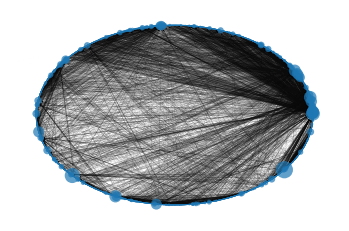

NameError: name 'G' is not defined

In [13]:
import matplotlib.pyplot as plt

#Size varies by the number of edges the node has (its degree)
sizes = [x[1] for x in G_retweet.degree()]

nx.draw_networkx(G_retweet,pos = nx.circular_layout(G_retweet),with_labels = False,node_size = sizes,width = 0.1,
                alpha = 0.7,
                arrowsize = 2,
                linewidths = 0)
plt.axis('off')
plt.show()
nx.write_gexf(G, "geeksforgeeks.gexf")

In [ ]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[____] for ____ in G_rt.____()]

# Draw the network
nx.draw_networkx(____, ____, 
    with_labels = False, 
    node_size = ____,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)